## Credit Risk Modeling

In [1]:
import pandas as pd
import numpy as np
import sys
sys.tracebacklimit = 0 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from scipy import stats 
from sklearn import manifold
from sklearn import metrics
from matplotlib import pyplot as plt
import prince

## Data Cleaning

In [2]:
df = pd.read_csv('accepted.csv')

/var/folders/c_/g3_6w_vn5vq7d8hqy9pb6tcm0000gn/T/ipykernel_62193/1686102350.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted.csv')


In [3]:
keep_cols = [
    # Loan info
    "loan_amnt", "term", "int_rate", "installment", "purpose",
    
    # Borrower demographics
    "emp_length", "home_ownership", "annual_inc", "verification_status",
    
    # Credit history
    "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", 
    "pub_rec", "revol_bal", "revol_util", "total_acc", "earliest_cr_line",
    
    # Lender grade
    "grade", "sub_grade",
    
    # Target
    "loan_status"
]

df_model = df[keep_cols].copy()
df_model = df_model.rename(columns={"annual_inc": "annual_income", "total_acc": "total_accounts", "sub_grade": "sub_grade_level", "int_rate": "interest_rate", "loan_amnt": "loan_amount", "loan_status": "loan_outcome", 
                              "emp_length": "employment_length", "delinq_2yrs": "delinquent_2yrs", "inq_last_6mths": "inquiries_last_6mths", "open_acc": "open_accounts", "pub_rec": "public_records", "revol_bal": "revolving_balance", 
                              "revol_util": "revolving_utilization", "earliest_cr_line": "earliest_credit_line", "grade": "grade_level", "term": "loan_term", "installment": "monthly_installment", 
                              "dti": "debt_to_income_ratio", "purpose": "loan_purpose", "home_ownership": "home_ownership_status", "verification_status": "income_verification_status"})

df_model.head(30)

,loan_amount,loan_term,interest_rate,monthly_installment,loan_purpose,employment_length,home_ownership_status,annual_income,income_verification_status,debt_to_income_ratio,...,inquiries_last_6mths,open_accounts,public_records,revolving_balance,revolving_utilization,total_accounts,earliest_credit_line,grade_level,sub_grade_level,loan_outcome
0,3600.0,36 months,13.99,123.03,debt_consolidation,10+ years,MORTGAGE,55000.0,Not Verified,5.91,...,1.0,7.0,0.0,2765.0,29.7,13.0,Aug-2003,C,C4,Fully Paid
1,24700.0,36 months,11.99,820.28,small_business,10+ years,MORTGAGE,65000.0,Not Verified,16.06,...,4.0,22.0,0.0,21470.0,19.2,38.0,Dec-1999,C,C1,Fully Paid
2,20000.0,60 months,10.78,432.66,home_improvement,10+ years,MORTGAGE,63000.0,Not Verified,10.78,...,0.0,6.0,0.0,7869.0,56.2,18.0,Aug-2000,B,B4,Fully Paid
3,35000.0,60 months,14.85,829.90,debt_consolidation,10+ years,MORTGAGE,110000.0,Source Verified,17.06,...,0.0,13.0,0.0,7802.0,11.6,17.0,Sep-2008,C,C5,Current
4,10400.0,60 months,22.45,289.91,major_purchase,3 years,MORTGAGE,104433.0,Source Verified,25.37,...,3.0,12.0,0.0,21929.0,64.5,35.0,Jun-1998,F,F1,Fully Paid
5,11950.0,36 months,13.44,405.18,debt_consolidation,4 years,RENT,34000.0,Source Verified,10.20,...,0.0,5.0,0.0,8822.0,68.4,6.0,Oct-1987,C,C3,Fully Paid
6,20000.0,36 months,9.17,637.58,debt_consolidation,10+ years,MORTGAGE,180000.0,Not Verified,14.67,...,0.0,12.0,0.0,87329.0,84.5,27.0,Jun-1990,B,B2,Fully Paid
7,20000.0,36 months,8.49,631.26,major_purchase,10+ years,MORTGAGE,85000.0,Not Verified,17.61,...,0.0,8.0,0.0,826.0,5.7,15.0,Feb-1999,B,B1,Fully Paid
8,10000.0,36 months,6.49,306.45,credit_card,6 years,RENT,85000.0,Not Verified,13.07,...,1.0,14.0,1.0,10464.0,34.5,23.0,Apr-2002,A,A2,Fully Paid
9,8000.0,36 months,11.48,263.74,credit_card,10+ years,MORTGAGE,42000.0,Not Verified,34.80,...,0.0,8.0,0.0,7034.0,39.1,18.0,Nov-1994,B,B5,Fully Paid


In [4]:
df_model.dtypes.sort_values()


loan_amount                   float64
total_accounts                float64
revolving_utilization         float64
revolving_balance             float64
public_records                float64
open_accounts                 float64
inquiries_last_6mths          float64
debt_to_income_ratio          float64
delinquent_2yrs               float64
annual_income                 float64
monthly_installment           float64
interest_rate                 float64
sub_grade_level                object
home_ownership_status          object
employment_length              object
loan_purpose                   object
loan_term                      object
earliest_credit_line           object
grade_level                    object
income_verification_status     object
loan_outcome                   object
dtype: object

In [5]:
df_model['loan_outcome'].value_counts()

loan_outcome
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [6]:
print(df_model.describe().T)

                           count          mean            std     min  \
loan_amount            2260668.0  15046.931228    9190.245488  500.00   
interest_rate          2260668.0     13.092829       4.832138    5.31   
monthly_installment    2260668.0    445.806823     267.173535    4.93   
annual_income          2260664.0  77992.428687  112696.199574    0.00   
debt_to_income_ratio   2258957.0     18.824196      14.183329   -1.00   
delinquent_2yrs        2260639.0      0.306879       0.867230    0.00   
inquiries_last_6mths   2260638.0      0.576835       0.885963    0.00   
open_accounts          2260639.0     11.612402       5.640861    0.00   
public_records         2260639.0      0.197528       0.570515    0.00   
revolving_balance      2260668.0  16658.458078   22948.305028    0.00   
revolving_utilization  2258866.0     50.337696      24.713073    0.00   
total_accounts         2260639.0     24.162552      11.987528    1.00   

                            25%       50%       75

In [7]:
df_model.isnull().sum()

loan_amount                       33
loan_term                         33
interest_rate                     33
monthly_installment               33
loan_purpose                      33
employment_length             146940
home_ownership_status             33
annual_income                     37
income_verification_status        33
debt_to_income_ratio            1744
delinquent_2yrs                   62
inquiries_last_6mths              63
open_accounts                     62
public_records                    62
revolving_balance                 33
revolving_utilization           1835
total_accounts                    62
earliest_credit_line              62
grade_level                       33
sub_grade_level                   33
loan_outcome                      33
dtype: int64

### Clean up in data values

In [8]:
# chatgpt suggested imputation for employment length
# Convert to numeric
# flag missing values for imputation so a new column is created that indicates 
df_model["employment_length"] = (
    df_model["employment_length"]
    .replace({"10+ years": "10", "< 1 year": "0"})
    .str.extract(r"(\d+)")
    .astype(float)
)

# Missingness flag
df_model["emp_length_missing"] = df_model["employment_length"].isna().astype(int)

# Impute numeric value (median is standard)
df_model["employment_length"] = (
    df_model["employment_length"]
    .fillna(df_model["employment_length"].median())
)

In [9]:
df_model = df_model.dropna(subset=["loan_term"])
df_model["loan_term"] = (
    df_model["loan_term"]
    .str.replace(" months", "", regex=False)
    .astype("Int64")
)

In [ ]:

dt = pd.to_datetime(df_model["earliest_credit_line"], format="%b-%Y", errors="coerce")
credit_years = ((pd.Timestamp.today() - dt).dt.days / 365.25)
df_model["credit_history_years"] = np.floor(credit_years).astype("Float64")  
df_model["credit_history_years"] = df_model["credit_history_years"].astype("Int64")  
df_model = df_model.drop(columns=["earliest_credit_line"])

In [ ]:
cat_cols = [
    "loan_outcome",
    "home_ownership_status",
    "loan_purpose",
    "grade_level",
    "sub_grade_level",
    "income_verification_status"
]

df_model[cat_cols] = df_model[cat_cols].astype("category")

### Target Outcome cleaning

Since there are 3 outcomes: charged off, 

In [ ]:
df_model = df_model[df_model["loan_outcome"].isin(["Fully Paid", "Charged Off"])]

df_model["default"] = (
    df_model["loan_outcome"] == "Charged Off"
).astype(int)

### Dropping any row that doesn't have a value for the target

I have decided to completely drop any row with an "NA" in loan outcome because the response variable must be fully observed in a supervised credit risk model. If a loan does not have an observed outcome (one of the three: fully paid, current, or charged off) it cannont be used to model training or evaluation.

In [ ]:
df_model = df_model.dropna(subset=["loan_outcome"])

Now we will get rid of any row that is current - does not help us understand our end goal of whether or not a line will be charged off or fully paid. There is a new category that will be determine by a 1 if the individual defaulted.

In [13]:
df_model = df_model[df_model["loan_outcome"].isin(["Fully Paid", "Charged Off"])]

df_model["default"] = (
    df_model["loan_outcome"] == "Charged Off"
).astype(int)

In [15]:
df_model.head(30)

,loan_amount,loan_term,interest_rate,monthly_installment,loan_purpose,employment_length,home_ownership_status,annual_income,income_verification_status,debt_to_income_ratio,...,public_records,revolving_balance,revolving_utilization,total_accounts,grade_level,sub_grade_level,loan_outcome,emp_length_missing,credit_history_years,default
0,3600.0,36,13.99,123.03,debt_consolidation,10.0,MORTGAGE,55000.0,Not Verified,5.91,...,0.0,2765.0,29.7,13.0,C,C4,Fully Paid,0,22,0
1,24700.0,36,11.99,820.28,small_business,10.0,MORTGAGE,65000.0,Not Verified,16.06,...,0.0,21470.0,19.2,38.0,C,C1,Fully Paid,0,26,0
2,20000.0,60,10.78,432.66,home_improvement,10.0,MORTGAGE,63000.0,Not Verified,10.78,...,0.0,7869.0,56.2,18.0,B,B4,Fully Paid,0,25,0
4,10400.0,60,22.45,289.91,major_purchase,3.0,MORTGAGE,104433.0,Source Verified,25.37,...,0.0,21929.0,64.5,35.0,F,F1,Fully Paid,0,27,0
5,11950.0,36,13.44,405.18,debt_consolidation,4.0,RENT,34000.0,Source Verified,10.20,...,0.0,8822.0,68.4,6.0,C,C3,Fully Paid,0,38,0
6,20000.0,36,9.17,637.58,debt_consolidation,10.0,MORTGAGE,180000.0,Not Verified,14.67,...,0.0,87329.0,84.5,27.0,B,B2,Fully Paid,0,35,0
7,20000.0,36,8.49,631.26,major_purchase,10.0,MORTGAGE,85000.0,Not Verified,17.61,...,0.0,826.0,5.7,15.0,B,B1,Fully Paid,0,26,0
8,10000.0,36,6.49,306.45,credit_card,6.0,RENT,85000.0,Not Verified,13.07,...,1.0,10464.0,34.5,23.0,A,A2,Fully Paid,0,23,0
9,8000.0,36,11.48,263.74,credit_card,10.0,MORTGAGE,42000.0,Not Verified,34.80,...,0.0,7034.0,39.1,18.0,B,B5,Fully Paid,0,31,0
12,1400.0,36,12.88,47.10,other,3.0,MORTGAGE,64000.0,Not Verified,34.95,...,0.0,37828.0,67.2,24.0,C,C2,Fully Paid,0,29,0


## Exploratory Data Analysis (EDA)

In [16]:
df_model["loan_purpose"].unique()


array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [17]:
df_model["loan_purpose"].value_counts()


loan_purpose
debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: count, dtype: int64

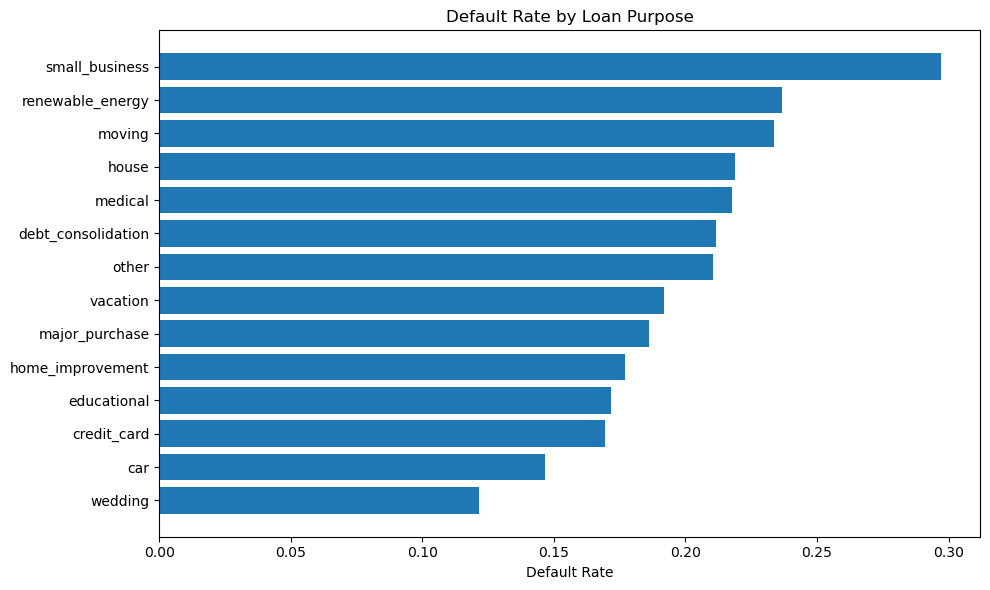

In [ ]:
default_rate = (
    df_model
    .groupby("loan_purpose")["default"]
    .mean()
    .sort_values(ascending=True)  
)

plt.figure(figsize=(10, 6))
plt.barh(default_rate.index, default_rate.values)
plt.xlabel("Default Rate")
plt.title("Default Rate by Loan Purpose")
plt.tight_layout()
plt.show()

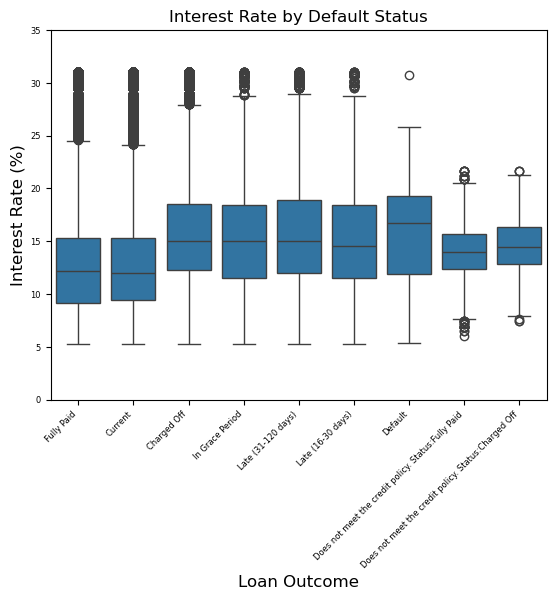

In [ ]:
sns.boxplot(x="loan_outcome", y="interest_rate", data=df_model)
plt.ylim(0, 35)
plt.xticks(rotation=45, ha="right", fontsize=6)
plt.yticks(fontsize=6)
plt.title("Interest Rate by Default Status")
plt.xlabel("Loan Outcome", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.show()


This plot shows that the individuals who have filly paid their loan off tend to have a lower interest rate, whereas the individuals who have been charged off tend to have a much higher interest rate at an average of about 5% higher than the fully paid average.

## Train / Test Split

## Preprocessing

## Modeling

### Logistic Regression

### LDA

### Random Forest

### XGBOOST